In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# !pip install imbalanced-learn
# from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

from sklearn import tree

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
import joblib

**Loading the dataset**

We now load our training data into the kernel to convert it into a dataframe

In [175]:
df = pd.read_csv('train_data.csv')
df

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,0.384615,inf,49.0,JAVA,large,NaN,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,0.826087,inf,64.0,Ruby,Medium,Library,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,0.590909,inf,70.0,ruby,Large,Desktop Application,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.5,21.51,...,0.652174,5.500,NaN,Python,Large,Desktop Application,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.9,8.40,...,0.846154,inf,216.0,Python,Small,NaN,16,0.732659,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74790,54886,61,8,5,6.0,157,20162.75,1.25,18.38,44.35,...,0.784091,5.125,NaN,JavaScript,Small,Library,4,0.822789,0.0,7
74791,76820,16,4,3,1.0,25,NaN,0.13,9.17,13.11,...,0.666667,inf,102.0,Java,Small,Library,8,0.001313,1.0,4
74792,65170,14,98,49,1.0,24,89.86,0.15,6.75,14.01,...,0.600000,0.800,33.0,JavaScript,SMALL,Web Application,6,5.824505,0.0,7
74793,860,17,2,36,72.0,36,165.06,0.17,5.85,28.52,...,5.727273,inf,79.0,C++,NaN,Library,3,0.031606,0.0,10


In [176]:
np.shape(df)


(74795, 37)

Checking the datatype characteristics of dataframe

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74795 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               74795 non-null  int64  
 1   McCabeLineCount                  74795 non-null  int64  
 2   McCabeCyclomaticComplexity       74795 non-null  int64  
 3   McCabeEssentialComplexity        74795 non-null  int64  
 4   McCabeDesignComplexity           58467 non-null  float64
 5   HalsteadTotalOperatorsOperands   74795 non-null  int64  
 6   HalsteadVolume                   61077 non-null  float64
 7   HalsteadProgramLength            74795 non-null  float64
 8   HalsteadDifficulty               67253 non-null  object 
 9   HalsteadIntelligence             69354 non-null  float64
 10  HalsteadEffort                   74795 non-null  float64
 11  HalsteadB                        74795 non-null  float64
 12  HalsteadTimeEstima

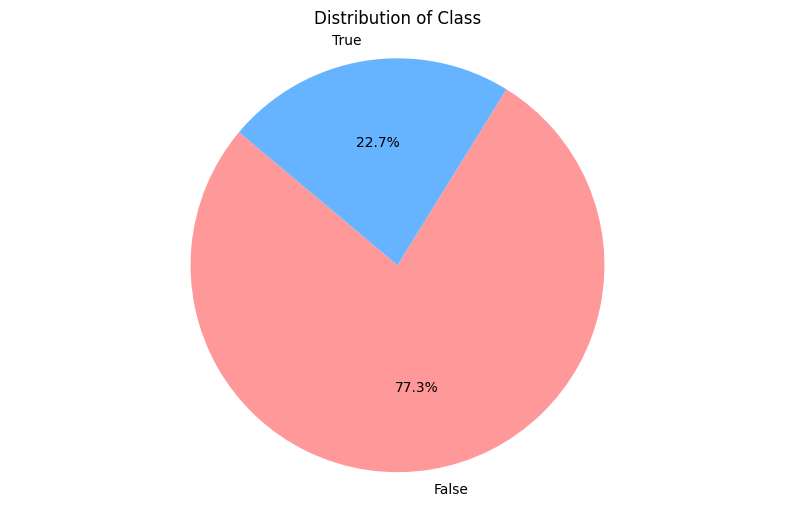

In [178]:
defects_count = df['defects'].value_counts()

labels = ['False', 'True']
sizes = defects_count.values
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Class')
plt.axis('equal')  

plt.show()

## Data Preprocessing ##

As we can see there are multiple missing values in the data in the feature columns, we are now checking for missing value %s across the features so that we can remove a column in case there are high number of missing values

In [179]:
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values,'Percentage': missing_percentage})

missing_info = missing_info.sort_values(by='Percentage', ascending=False)
missing_info.head(37)

,Missing Values,Percentage
CommentDensity,23845,31.880473
OperatorToOperandRatio,17436,23.311719
McCabeDesignComplexity,16328,21.830336
CodeSizeCategory,14632,19.562805
HalsteadLineCountBlank,14139,18.903670
HalsteadTimeEstimator,13856,18.525302
CodeAge,13761,18.398289
HalsteadVolume,13718,18.340798
TotalOperators,12735,17.026539
UniqueOperators,10698,14.303095


So we see 'Comment Density' has the highest % of missing value but it is still not enough to remove the feature column from the dataframe completely, we usually consider a threshold of 50% missing values to consider removal of a feature column

Hence we will impute the missing values across the features with the categorical mean of the rows

In [180]:
duplicates = df[df.duplicated(subset=['id'], keep=False)]
duplicates['id']

23        4441
35       89713
60       68886
62       81487
72       46401
         ...  
74740    68148
74742    76552
74758    35773
74772    30601
74792    65170
Name: id, Length: 5064, dtype: int64

In [181]:
missing_percentage = duplicates.iloc[:, 1:].isna().mean(axis=1) * 100
duplicate_rows_missing_percentage = pd.DataFrame({'id': duplicates['id'],'Missing_Percentage': missing_percentage})

duplicate_rows_missing_percentage = duplicate_rows_missing_percentage.sort_values(by='id', ascending = False)
duplicate_rows_missing_percentage.head(20)

,id,Missing_Percentage
17254,101753,2.777778
3506,101753,2.777778
40312,101679,11.111111
46891,101679,11.111111
72858,101660,5.555556
17632,101660,5.555556
48018,101622,13.888889
62769,101622,13.888889
35898,101560,5.555556
69257,101560,5.555556


So as we see the duplicate rows are identical to each other so it does not matter if we remove the first or last instance, so we implement dropping of duplicates

In [182]:
# Remove duplicate rows
df_final = df.drop_duplicates()
df_final_clean = df_final.dropna(subset=['id'])

print(np.shape(df))
print(np.shape(df_final_clean))

df_final_clean


(74795, 37)
(72263, 37)


,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,0.384615,inf,49.0,JAVA,large,NaN,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,0.826087,inf,64.0,Ruby,Medium,Library,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,0.590909,inf,70.0,ruby,Large,Desktop Application,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.5,21.51,...,0.652174,5.500000,NaN,Python,Large,Desktop Application,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.9,8.40,...,0.846154,inf,216.0,Python,Small,NaN,16,0.732659,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74789,6265,58,8,3,7.0,163,NaN,0.04,26.21,32.61,...,0.609524,109.333333,7168.0,Ruby,NaN,Library,32,0.481515,0.0,64
74790,54886,61,8,5,6.0,157,20162.75,1.25,18.38,44.35,...,0.784091,5.125000,NaN,JavaScript,Small,Library,4,0.822789,0.0,7
74791,76820,16,4,3,1.0,25,NaN,0.13,9.17,13.11,...,0.666667,inf,102.0,Java,Small,Library,8,0.001313,1.0,4
74793,860,17,2,36,72.0,36,165.06,0.17,5.85,28.52,...,5.727273,inf,79.0,C++,NaN,Library,3,0.031606,0.0,10


In [183]:
# Fetch all column names and convert to list
column_names_list = df_final_clean.columns.tolist()

# Print column names list
print(column_names_list)
columns_to_be_removed = ['CodeLanguage', 'CodeSizeCategory', 'CodeType']
columns_to_check = [element for element in column_names_list if element not in columns_to_be_removed]
target_column = ['defects']

print(columns_to_check)
value_df = df_final_clean[columns_to_check]
value_df

['id', 'McCabeLineCount', 'McCabeCyclomaticComplexity', 'McCabeEssentialComplexity', 'McCabeDesignComplexity', 'HalsteadTotalOperatorsOperands', 'HalsteadVolume', 'HalsteadProgramLength', 'HalsteadDifficulty', 'HalsteadIntelligence', 'HalsteadEffort', 'HalsteadB', 'HalsteadTimeEstimator', 'HalsteadLineCountCode', 'HalsteadLineCountComment', 'HalsteadLineCountBlank', 'HalsteadLineCountCodeAndComment', 'UniqueOperators', 'UniqueOperands', 'TotalOperators', 'TotalOperands', 'BranchCount', 'defects', 'CodeDensity', 'OperatorToOperandRatio', 'CommentDensity', 'ComplexityEfficiency', 'OperandsPerOperator', 'CodeAndCommentRatio', 'CodeAge', 'CodeLanguage', 'CodeSizeCategory', 'CodeType', 'CodeQuality', 'QualityScore', 'IsDeprecated', 'TeamSize']
['id', 'McCabeLineCount', 'McCabeCyclomaticComplexity', 'McCabeEssentialComplexity', 'McCabeDesignComplexity', 'HalsteadTotalOperatorsOperands', 'HalsteadVolume', 'HalsteadProgramLength', 'HalsteadDifficulty', 'HalsteadIntelligence', 'HalsteadEffort',

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,NaN,NaN,0.355239787,0.384615,inf,49.0,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,1.210526316,NaN,0.259067358,0.826087,inf,64.0,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,1.692307692,NaN,0.273597811,0.590909,inf,70.0,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.5,21.51,...,1.533333333,NaN,2,0.652174,5.500000,NaN,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.9,8.40,...,NaN,NaN,0.303030303,0.846154,inf,216.0,16,0.732659,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74789,6265,58,8,3,7.0,163,NaN,0.04,26.21,32.61,...,1.640625,NaN,0.305227013,0.609524,109.333333,7168.0,32,0.481515,0.0,64
74790,54886,61,8,5,6.0,157,20162.75,1.25,18.38,44.35,...,1.275362319,0.666667,0.435255713,0.784091,5.125000,NaN,4,0.822789,0.0,7
74791,76820,16,4,3,1.0,25,NaN,0.13,9.17,13.11,...,1.5,0.000000,0.436205016,0.666667,inf,102.0,8,0.001313,1.0,4
74793,860,17,2,36,72.0,36,165.06,0.17,5.85,28.52,...,70.71428571,0.000000,NAN,5.727273,inf,79.0,3,0.031606,0.0,10


## Cleaning the data from textual variables "NAN" and "INF"

In [184]:
clean_df = value_df
clean_df.replace(np.inf, "", inplace=True)
clean_df.replace(np.nan, "", inplace=True)

clean_df


C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1671839838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.replace(np.inf, "", inplace=True)
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1671839838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.replace(np.nan, "", inplace=True)


,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,,...,,,0.355239787,0.384615,,49.0,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,1.210526316,,0.259067358,0.826087,,64.0,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,1.692307692,,0.273597811,0.590909,,70.0,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,,0.13,7.5,21.51,...,1.533333333,,2,0.652174,5.5,,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.1,0.11,9.9,8.4,...,,,0.303030303,0.846154,,216.0,16,0.732659,,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74789,6265,58,8,3,7.0,163,,0.04,26.21,32.61,...,1.640625,,0.305227013,0.609524,109.333333,7168.0,32,0.481515,0.0,64
74790,54886,61,8,5,6.0,157,20162.75,1.25,18.38,44.35,...,1.275362319,0.666667,0.435255713,0.784091,5.125,,4,0.822789,0.0,7
74791,76820,16,4,3,1.0,25,,0.13,9.17,13.11,...,1.5,0.0,0.436205016,0.666667,,102.0,8,0.001313,1.0,4
74793,860,17,2,36,72.0,36,165.06,0.17,5.85,28.52,...,70.71428571,0.0,NAN,5.727273,,79.0,3,0.031606,0.0,10


In [185]:
clean_df

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,,...,,,0.355239787,0.384615,,49.0,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,1.210526316,,0.259067358,0.826087,,64.0,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,1.692307692,,0.273597811,0.590909,,70.0,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,,0.13,7.5,21.51,...,1.533333333,,2,0.652174,5.5,,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.1,0.11,9.9,8.4,...,,,0.303030303,0.846154,,216.0,16,0.732659,,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74789,6265,58,8,3,7.0,163,,0.04,26.21,32.61,...,1.640625,,0.305227013,0.609524,109.333333,7168.0,32,0.481515,0.0,64
74790,54886,61,8,5,6.0,157,20162.75,1.25,18.38,44.35,...,1.275362319,0.666667,0.435255713,0.784091,5.125,,4,0.822789,0.0,7
74791,76820,16,4,3,1.0,25,,0.13,9.17,13.11,...,1.5,0.0,0.436205016,0.666667,,102.0,8,0.001313,1.0,4
74793,860,17,2,36,72.0,36,165.06,0.17,5.85,28.52,...,70.71428571,0.0,NAN,5.727273,,79.0,3,0.031606,0.0,10


In [186]:
categorical_columns = clean_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['McCabeDesignComplexity', 'HalsteadVolume', 'HalsteadDifficulty',
       'HalsteadIntelligence', 'HalsteadTimeEstimator',
       'HalsteadLineCountCode', 'HalsteadLineCountBlank',
       'HalsteadLineCountCodeAndComment', 'UniqueOperators', 'TotalOperators',
       'CodeDensity', 'OperatorToOperandRatio', 'CommentDensity',
       'ComplexityEfficiency', 'OperandsPerOperator', 'CodeAndCommentRatio',
       'CodeAge', 'IsDeprecated'],
      dtype='object')

In [187]:
for column in categorical_columns:
    clean_df[column] = pd.to_numeric(clean_df[column], errors='coerce')

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\203213575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[column] = pd.to_numeric(clean_df[column], errors='coerce')


In [188]:
clean_df

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,NaN,NaN,0.355240,0.384615,NaN,49.0,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,1.210526,NaN,0.259067,0.826087,NaN,64.0,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,1.692308,NaN,0.273598,0.590909,NaN,70.0,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.50,21.51,...,1.533333,NaN,2.000000,0.652174,5.500000,NaN,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.90,8.40,...,NaN,NaN,0.303030,0.846154,NaN,216.0,16,0.732659,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74789,6265,58,8,3,7.0,163,NaN,0.04,26.21,32.61,...,1.640625,NaN,0.305227,0.609524,109.333333,7168.0,32,0.481515,0.0,64
74790,54886,61,8,5,6.0,157,20162.75,1.25,18.38,44.35,...,1.275362,0.666667,0.435256,0.784091,5.125000,NaN,4,0.822789,0.0,7
74791,76820,16,4,3,1.0,25,NaN,0.13,9.17,13.11,...,1.500000,0.000000,0.436205,0.666667,NaN,102.0,8,0.001313,1.0,4
74793,860,17,2,36,72.0,36,165.06,0.17,5.85,28.52,...,70.714286,0.000000,NaN,5.727273,NaN,79.0,3,0.031606,0.0,10


In [189]:
# Check for any NaN values
has_nan = clean_df.isnull().values.any()

# Check for any infinite values
has_inf = np.isinf(clean_df).values.any()

print(has_nan)
print(has_inf)

True
True


Imputation of missing values with mean

In [190]:
clean_df.fillna(clean_df.mean(numeric_only=True), inplace=True)
clean_df

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\2334510211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.fillna(clean_df.mean(numeric_only=True), inplace=True)


,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.610000,0.18,5.63,229.106943,...,inf,0.841344,0.355240,0.384615,36.276700,49.000000,1,0.228319,1.000000,4
1,77265,85293,4,4,1.0,3321,13848.570000,0.06,15.44,10.910000,...,1.210526,0.841344,0.259067,0.826087,36.276700,64.000000,8,0.792022,1.000000,6
2,62215,14,2,1,2.0,35,151.270000,0.14,7.31,19.750000,...,1.692308,0.841344,0.273598,0.590909,36.276700,70.000000,3,0.725787,5.000000,4
3,11168,19,3,1,3.0,38,5383.049652,0.13,7.50,21.510000,...,1.533333,0.841344,2.000000,0.652174,5.500000,188.231663,30,3.532268,0.000000,10
4,45035,8,3,1,1.0,24,98.100000,0.11,9.90,8.400000,...,inf,0.841344,0.303030,0.846154,36.276700,216.000000,16,0.732659,1.257747,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74789,6265,58,8,3,7.0,163,5383.049652,0.04,26.21,32.610000,...,1.640625,0.841344,0.305227,0.609524,109.333333,7168.000000,32,0.481515,0.000000,64
74790,54886,61,8,5,6.0,157,20162.750000,1.25,18.38,44.350000,...,1.275362,0.666667,0.435256,0.784091,5.125000,188.231663,4,0.822789,0.000000,7
74791,76820,16,4,3,1.0,25,5383.049652,0.13,9.17,13.110000,...,1.500000,0.000000,0.436205,0.666667,36.276700,102.000000,8,0.001313,1.000000,4
74793,860,17,2,36,72.0,36,165.060000,0.17,5.85,28.520000,...,70.714286,0.000000,inf,5.727273,36.276700,79.000000,3,0.031606,0.000000,10


In [191]:
# Check for any NaN values
has_nan = clean_df.isnull().values.any()

# Check for any infinite values
has_inf = np.isinf(clean_df).values.any()

print(has_nan)
print(has_inf)

False
True


In [192]:
clean_df['defects'] = clean_df['defects'].replace({"TRUE": 1, "FALSE" : 0})

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\2558566578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['defects'] = clean_df['defects'].replace({"TRUE": 1, "FALSE" : 0})


In [193]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72263 entries, 0 to 74794
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               72263 non-null  int64  
 1   McCabeLineCount                  72263 non-null  int64  
 2   McCabeCyclomaticComplexity       72263 non-null  int64  
 3   McCabeEssentialComplexity        72263 non-null  int64  
 4   McCabeDesignComplexity           72263 non-null  float64
 5   HalsteadTotalOperatorsOperands   72263 non-null  int64  
 6   HalsteadVolume                   72263 non-null  float64
 7   HalsteadProgramLength            72263 non-null  float64
 8   HalsteadDifficulty               72263 non-null  float64
 9   HalsteadIntelligence             72263 non-null  float64
 10  HalsteadEffort                   72263 non-null  float64
 11  HalsteadB                        72263 non-null  float64
 12  HalsteadTimeEstimator  

In [194]:
clean_df['defects'] = clean_df['defects'].astype('int')
clean_df['defects'].dtype

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\2283117118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['defects'] = clean_df['defects'].astype('int')


dtype('int32')

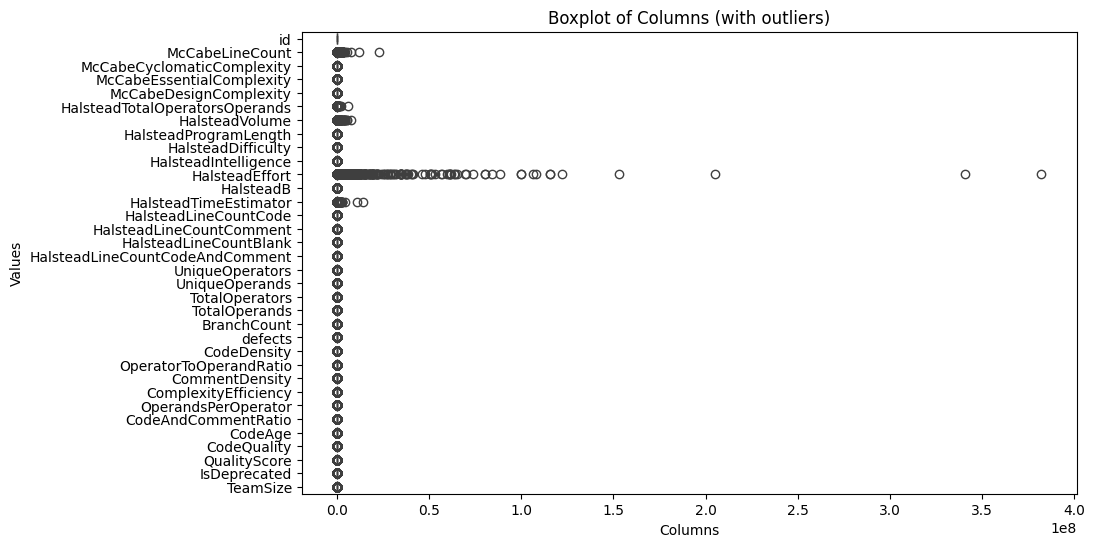

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, orient='h', color="white")
plt.title("Boxplot of Columns (with outliers)")
plt.ylabel("Values")
plt.xlabel("Columns")
plt.show()

In [196]:
def remove_outliers_log(column):
    # Apply log transformation
    transformed_column = np.log1p(column)
    
    # Calculate IQR on the transformed data
    Q1 = transformed_column.quantile(0.25)
    Q3 = transformed_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers on the transformed data
    filtered_transformed_column = transformed_column[(transformed_column >= lower_bound) & (transformed_column <= upper_bound)]
    
    # Convert back to the original scale
    filtered_column = np.expm1(filtered_transformed_column)
    
    return filtered_column

In [197]:
columns_to_check = [col for col in clean_df.columns if col != 'defects']

for col in columns_to_check:
    clean_df[col] = remove_outliers_log(clean_df[col])

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1490653199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = remove_outliers_log(clean_df[col])
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1490653199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col] = remove_outliers_log(clean_df[col])
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1490653199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [198]:
for col in columns_to_check:
    clean_df[col].fillna(clean_df[col].mean(), inplace=True)

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1840182748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df[col].fillna(clean_df[col].mean(), inplace=True)
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1840182748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[col].fillna(clean_df[col].mean(), inplace=True)

In [199]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72263 entries, 0 to 74794
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               72263 non-null  float64
 1   McCabeLineCount                  72263 non-null  float64
 2   McCabeCyclomaticComplexity       72263 non-null  float64
 3   McCabeEssentialComplexity        72263 non-null  float64
 4   McCabeDesignComplexity           72263 non-null  float64
 5   HalsteadTotalOperatorsOperands   72263 non-null  float64
 6   HalsteadVolume                   72263 non-null  float64
 7   HalsteadProgramLength            72263 non-null  float64
 8   HalsteadDifficulty               72263 non-null  float64
 9   HalsteadIntelligence             72263 non-null  float64
 10  HalsteadEffort                   72263 non-null  float64
 11  HalsteadB                        72263 non-null  float64
 12  HalsteadTimeEstimator  

In [200]:
correlation_matrix = clean_df.corr()
correlation_matrix['defects']

correlation_defects = correlation_matrix.sort_values(by= 'defects', ascending = False)
round(correlation_defects['defects']*100,2)

defects                            100.00
McCabeLineCount                     41.81
McCabeCyclomaticComplexity          35.29
UniqueOperators                     28.30
McCabeEssentialComplexity           26.23
HalsteadDifficulty                  23.72
BranchCount                         18.64
HalsteadTotalOperatorsOperands      18.17
HalsteadB                           18.16
TotalOperators                      17.20
TotalOperands                       16.41
OperandsPerOperator                 16.02
HalsteadLineCountBlank              15.57
CodeAndCommentRatio                 15.32
HalsteadEffort                      15.12
UniqueOperands                      13.03
CommentDensity                      10.61
HalsteadLineCountCode                8.63
McCabeDesignComplexity               8.33
HalsteadIntelligence                 7.97
HalsteadLineCountComment             6.46
HalsteadTimeEstimator                6.42
ComplexityEfficiency                 6.17
HalsteadVolume                    

<function matplotlib.pyplot.show(close=None, block=None)>

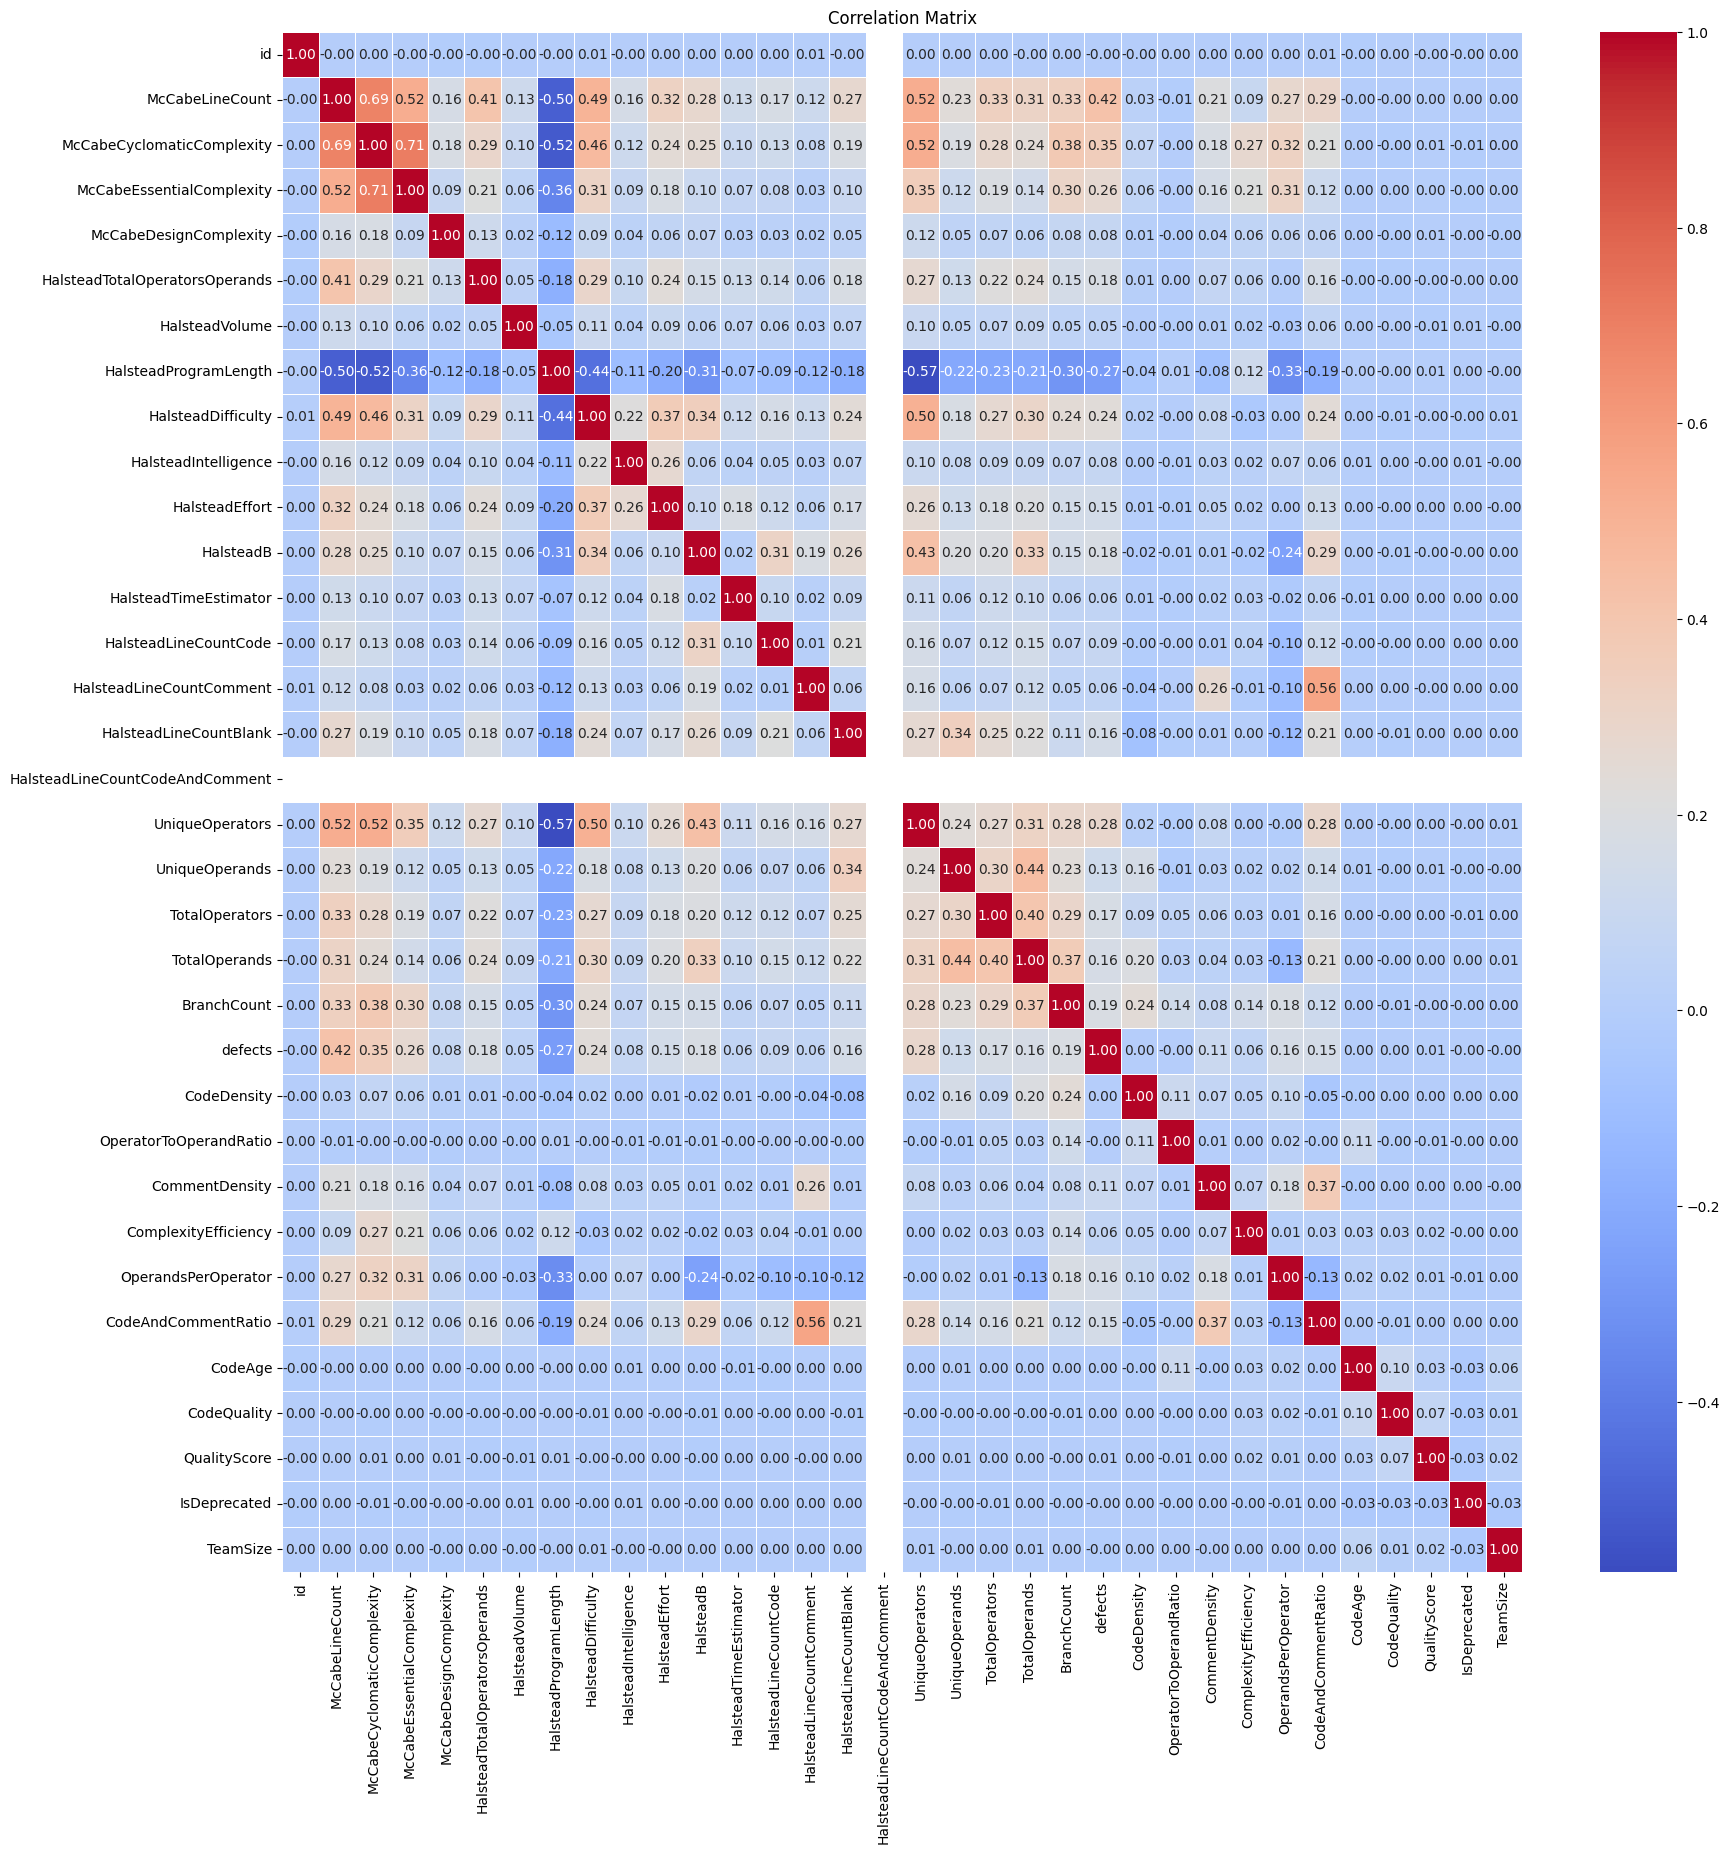

In [201]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show

In [202]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72263 entries, 0 to 74794
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               72263 non-null  float64
 1   McCabeLineCount                  72263 non-null  float64
 2   McCabeCyclomaticComplexity       72263 non-null  float64
 3   McCabeEssentialComplexity        72263 non-null  float64
 4   McCabeDesignComplexity           72263 non-null  float64
 5   HalsteadTotalOperatorsOperands   72263 non-null  float64
 6   HalsteadVolume                   72263 non-null  float64
 7   HalsteadProgramLength            72263 non-null  float64
 8   HalsteadDifficulty               72263 non-null  float64
 9   HalsteadIntelligence             72263 non-null  float64
 10  HalsteadEffort                   72263 non-null  float64
 11  HalsteadB                        72263 non-null  float64
 12  HalsteadTimeEstimator  

# RandomForest

[[10587   686]
 [ 1990  1190]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     11273
           1       0.63      0.37      0.47      3180

    accuracy                           0.81     14453
   macro avg       0.74      0.66      0.68     14453
weighted avg       0.80      0.81      0.80     14453



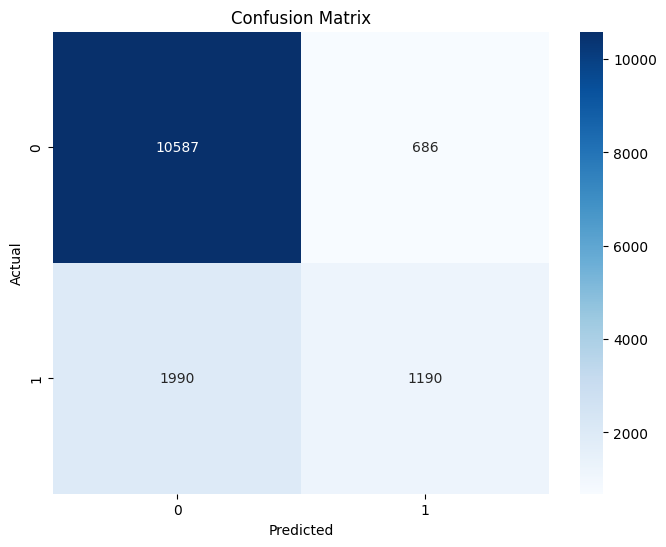

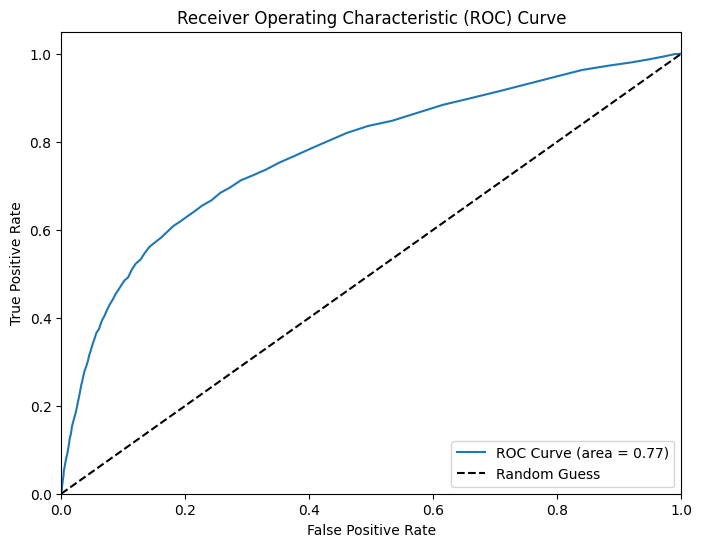

In [203]:
# Split the data
X = clean_df.drop(columns=['defects'])
y = clean_df['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'rfc_model.pkl')


# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Plot
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Test Data ##

In [204]:
df_test = pd.read_csv('test_data.csv')
df_test

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,56120,7,1,1,1.0,14,46.51,0.38,2.67,19.93,...,3.750000,inf,118.0,JAVA,Small,Library,4,0.461219,0.0,10
1,64981,8,3,1,NaN,25,100.00,0.11,8.75,12.00,...,0.666667,inf,72.0,C++,Medium,Library,3,0.396717,1.0,5
2,42984,37,392,343,3.0,89,461.25,0.06,17.27,26.45,...,0.780000,14.0,NaN,Ruby,NaN,Web Application,1,0.430680,0.0,2
3,54865,30,4,1,NaN,77,338.58,0.04,25.38,11.04,...,0.456522,30.0,29.0,java,Small,Library,10,0.362085,0.0,6
4,79712,19,6,1,2.0,56,233.52,0.06,17.5,NaN,...,0.600000,7.0,27.0,Python,Medium,Library,7,0.199284,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,1061,68,6,1,6.0,235,1248.40,0.05,21.78,53.30,...,4.965517,47.0,696.0,python,Small,Library,2,0.136864,0.0,2
32052,30330,27,3,3,2.0,0,0.00,0.00,0,0.00,...,NaN,NaN,NaN,JavaScript,Small,NaN,10,0.007841,1.0,8
32053,100633,15,2,36,NaN,36,152.00,0.09,11,12.22,...,0.440000,inf,NaN,Python,Medium,Web Application,30,4.560739,0.0,10
32054,74862,8,1,1,NaN,2025,7493.31,0.27,3.67,26.05,...,1.083333,inf,NaN,Python,Medium,NaN,5,0.844666,1.0,5


In [205]:
np.shape(df_test)

(32056, 36)

In [206]:
missing_values_test = df_test.isnull().sum()

missing_percentage_test = (missing_values_test / len(df_test)) * 100
missing_info_test = pd.DataFrame({'Missing Values': missing_values_test,'Percentage': missing_percentage_test})

missing_info_test = missing_info_test.sort_values(by='Percentage', ascending=False)
missing_info_test.head(37)

,Missing Values,Percentage
CommentDensity,10380,32.380834
OperatorToOperandRatio,7519,23.455827
McCabeDesignComplexity,6931,21.621537
CodeSizeCategory,6383,19.912029
HalsteadLineCountBlank,6194,19.322436
HalsteadTimeEstimator,5971,18.626778
CodeAge,5920,18.467682
HalsteadVolume,5916,18.455203
TotalOperators,5476,17.082605
UniqueOperators,4460,13.913152


In [207]:
# Fetch all column names and convert to list
df_final_clean_test = df_test
column_names_list_test = df_final_clean_test.columns.tolist()

# Print column names list
print(column_names_list_test)
columns_to_be_removed_test = ['CodeLanguage', 'CodeSizeCategory', 'CodeType']
columns_to_check_test = [element_test for element_test in column_names_list_test if element_test not in columns_to_be_removed_test]
target_column_test = ['defects']

print(columns_to_check_test)
value_df_test = df_final_clean_test[columns_to_check_test]
value_df_test

['id', 'McCabeLineCount', 'McCabeCyclomaticComplexity', 'McCabeEssentialComplexity', 'McCabeDesignComplexity', 'HalsteadTotalOperatorsOperands', 'HalsteadVolume', 'HalsteadProgramLength', 'HalsteadDifficulty', 'HalsteadIntelligence', 'HalsteadEffort', 'HalsteadB', 'HalsteadTimeEstimator', 'HalsteadLineCountCode', 'HalsteadLineCountComment', 'HalsteadLineCountBlank', 'HalsteadLineCountCodeAndComment', 'UniqueOperators', 'UniqueOperands', 'TotalOperators', 'TotalOperands', 'BranchCount', 'CodeDensity', 'OperatorToOperandRatio', 'CommentDensity', 'ComplexityEfficiency', 'OperandsPerOperator', 'CodeAndCommentRatio', 'CodeAge', 'CodeLanguage', 'CodeSizeCategory', 'CodeType', 'CodeQuality', 'QualityScore', 'IsDeprecated', 'TeamSize']
['id', 'McCabeLineCount', 'McCabeCyclomaticComplexity', 'McCabeEssentialComplexity', 'McCabeDesignComplexity', 'HalsteadTotalOperatorsOperands', 'HalsteadVolume', 'HalsteadProgramLength', 'HalsteadDifficulty', 'HalsteadIntelligence', 'HalsteadEffort', 'HalsteadB

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,56120,7,1,1,1.0,14,46.51,0.38,2.67,19.93,...,1.333333333,0.000000,0.374531835,3.750000,inf,118.0,4,0.461219,0.0,10
1,64981,8,3,1,NaN,25,100.00,0.11,8.75,12.00,...,1.5,NaN,0.342857143,0.666667,inf,72.0,3,0.396717,1.0,5
2,42984,37,392,343,3.0,89,461.25,0.06,17.27,26.45,...,1.282051282,0.333333,0.463231036,0.780000,14.0,NaN,1,0.430680,0.0,2
3,54865,30,4,1,NaN,77,338.58,0.04,25.38,11.04,...,NAN,0.500000,0.157604413,0.456522,30.0,29.0,10,0.362085,0.0,6
4,79712,19,6,1,2.0,56,233.52,0.06,17.5,NaN,...,1.666666667,2.000000,0.342857143,0.600000,7.0,27.0,7,0.199284,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,1061,68,6,1,6.0,235,1248.40,0.05,21.78,53.30,...,12.88888889,0.888889,0.275482094,4.965517,47.0,696.0,2,0.136864,0.0,2
32052,30330,27,3,3,2.0,0,0.00,0.00,0,0.00,...,NaN,NaN,inf,NaN,NaN,NaN,10,0.007841,1.0,8
32053,100633,15,2,36,NaN,36,152.00,0.09,11,12.22,...,2.272727273,0.000000,0.909090909,0.440000,inf,NaN,30,4.560739,0.0,10
32054,74862,8,1,1,NaN,2025,7493.31,0.27,3.67,26.05,...,0.923076923,0.000000,0.272479564,1.083333,inf,NaN,5,0.844666,1.0,5


In [208]:
clean_df_test = value_df_test
clean_df_test.replace(np.inf, "", inplace=True)
clean_df_test.replace(np.nan, "", inplace=True)

clean_df_test.info()


C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1546378181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test.replace(np.inf, "", inplace=True)
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\1546378181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test.replace(np.nan, "", inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32056 entries, 0 to 32055
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               32056 non-null  int64  
 1   McCabeLineCount                  32056 non-null  int64  
 2   McCabeCyclomaticComplexity       32056 non-null  int64  
 3   McCabeEssentialComplexity        32056 non-null  int64  
 4   McCabeDesignComplexity           32056 non-null  object 
 5   HalsteadTotalOperatorsOperands   32056 non-null  int64  
 6   HalsteadVolume                   32056 non-null  object 
 7   HalsteadProgramLength            32056 non-null  float64
 8   HalsteadDifficulty               32056 non-null  object 
 9   HalsteadIntelligence             32056 non-null  object 
 10  HalsteadEffort                   32056 non-null  float64
 11  HalsteadB                        32056 non-null  float64
 12  HalsteadTimeEstima

In [209]:
categorical_columns_test = clean_df_test.select_dtypes(include=['object']).columns
categorical_columns_test

Index(['McCabeDesignComplexity', 'HalsteadVolume', 'HalsteadDifficulty',
       'HalsteadIntelligence', 'HalsteadTimeEstimator',
       'HalsteadLineCountCode', 'HalsteadLineCountBlank',
       'HalsteadLineCountCodeAndComment', 'UniqueOperators', 'TotalOperators',
       'CodeDensity', 'OperatorToOperandRatio', 'CommentDensity',
       'ComplexityEfficiency', 'OperandsPerOperator', 'CodeAndCommentRatio',
       'CodeAge', 'IsDeprecated'],
      dtype='object')

In [210]:
for column_test in categorical_columns_test:
    clean_df_test[column_test] = pd.to_numeric(clean_df_test[column_test], errors='coerce')

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\4286012365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test[column_test] = pd.to_numeric(clean_df_test[column_test], errors='coerce')


In [211]:
clean_df_test.fillna(clean_df_test.mean(numeric_only=True), inplace=True)
clean_df_test

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\2671435534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test.fillna(clean_df_test.mean(numeric_only=True), inplace=True)


,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,56120,7,1,1,1.000000,14,46.51,0.38,2.67,19.930000,...,1.333333,0.000000,0.374532,3.750000,32.382994,118.0000,4,0.461219,0.0,10
1,64981,8,3,1,27.365692,25,100.00,0.11,8.75,12.000000,...,1.500000,0.885624,0.342857,0.666667,32.382994,72.0000,3,0.396717,1.0,5
2,42984,37,392,343,3.000000,89,461.25,0.06,17.27,26.450000,...,1.282051,0.333333,0.463231,0.780000,14.000000,181.1809,1,0.430680,0.0,2
3,54865,30,4,1,27.365692,77,338.58,0.04,25.38,11.040000,...,inf,0.500000,0.157604,0.456522,30.000000,29.0000,10,0.362085,0.0,6
4,79712,19,6,1,2.000000,56,233.52,0.06,17.50,241.543894,...,1.666667,2.000000,0.342857,0.600000,7.000000,27.0000,7,0.199284,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,1061,68,6,1,6.000000,235,1248.40,0.05,21.78,53.300000,...,12.888889,0.888889,0.275482,4.965517,47.000000,696.0000,2,0.136864,0.0,2
32052,30330,27,3,3,2.000000,0,0.00,0.00,0.00,0.000000,...,inf,0.885624,inf,1.815976,32.382994,181.1809,10,0.007841,1.0,8
32053,100633,15,2,36,27.365692,36,152.00,0.09,11.00,12.220000,...,2.272727,0.000000,0.909091,0.440000,32.382994,181.1809,30,4.560739,0.0,10
32054,74862,8,1,1,27.365692,2025,7493.31,0.27,3.67,26.050000,...,0.923077,0.000000,0.272480,1.083333,32.382994,181.1809,5,0.844666,1.0,5


In [212]:
# Check for any NaN values
has_nan = clean_df_test.isnull().values.any()

# Check for any infinite values
has_inf = np.isinf(clean_df_test).values.any()

print(has_nan)
print(has_inf)

False
True


In [213]:
# clean_df_test['defects'] = clean_df_test['defects'].astype('int')
# clean_df_test['defects'].dtype

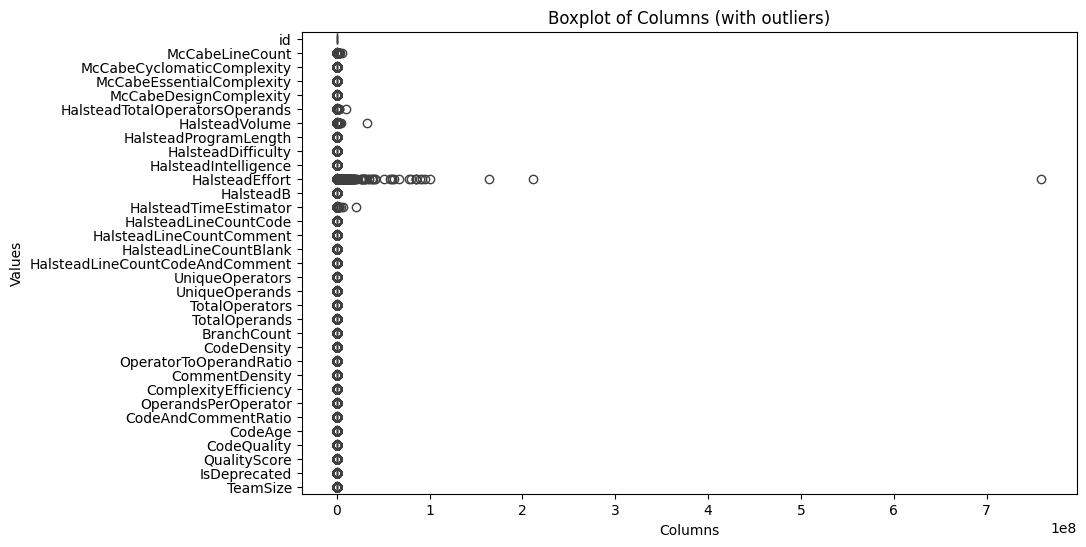

In [214]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df_test, orient='h', color="white")
plt.title("Boxplot of Columns (with outliers)")
plt.ylabel("Values")
plt.xlabel("Columns")
plt.show()

In [215]:
def remove_outliers_log(column_test):
    # Apply log transformation
    transformed_column_test = np.log1p(column_test)
    
    # Calculate IQR on the transformed data
    Q1_test = transformed_column_test.quantile(0.25)
    Q3_test = transformed_column_test.quantile(0.75)
    IQR_test = Q3_test - Q1_test
    lower_bound_test = Q1_test - 1.5 * IQR_test
    upper_bound_test = Q3_test + 1.5 * IQR_test
    
    # Filter out outliers on the transformed data
    filtered_transformed_column_test = transformed_column_test[(transformed_column_test >= lower_bound_test) & (transformed_column_test <= upper_bound_test)]
    
    # Convert back to the original scale
    filtered_column_test = np.expm1(filtered_transformed_column_test)
    
    return filtered_column_test

In [216]:
columns_to_check_test = [col_test for col_test in clean_df_test.columns if col_test != 'defects']

for col_test in columns_to_check_test:
    clean_df_test[col_test] = remove_outliers_log(clean_df_test[col_test])

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\22315368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test[col_test] = remove_outliers_log(clean_df_test[col_test])
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\22315368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test[col_test] = remove_outliers_log(clean_df_test[col_test])
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\22315368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [217]:
for col_test in columns_to_check_test:
    clean_df_test[col_test].fillna(clean_df_test[col_test].mean(), inplace=True)

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\3342344496.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df_test[col_test].fillna(clean_df_test[col_test].mean(), inplace=True)
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\3342344496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test[col_test].fillna(clean

In [218]:
# Check for any NaN values
has_nan = clean_df_test.isnull().values.any()

# Check for any infinite values
has_inf = np.isinf(clean_df_test).values.any()

print(has_nan)
print(has_inf)

False
False


In [219]:
clean_df.to_csv("test_file_check.csv", index=False)

In [220]:
clean_df_test

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,56120.000000,7.0,1.000000,1.000000,1.000000,14.000000,46.51,0.38,2.670000,19.930000,...,1.333333,0.000000,0.374532,0.786616,32.382994,118.0000,4.000000,0.461219,0.0,10.0
1,64981.000000,8.0,3.000000,1.000000,27.365692,25.000000,100.00,0.11,8.750000,12.000000,...,1.500000,0.885624,0.342857,0.666667,32.382994,72.0000,3.000000,0.396717,1.0,5.0
2,42984.000000,37.0,5.025362,2.691569,3.000000,89.000000,461.25,0.06,17.270000,26.450000,...,1.282051,0.333333,0.463231,0.780000,32.382994,181.1809,1.000000,0.430680,0.0,2.0
3,54865.000000,30.0,4.000000,1.000000,27.365692,77.000000,338.58,0.04,25.380000,11.040000,...,4.351575,0.500000,0.157604,0.456522,32.382994,29.0000,10.000000,0.362085,0.0,6.0
4,79712.000000,19.0,6.000000,1.000000,2.000000,56.000000,233.52,0.06,17.500000,241.543894,...,1.666667,2.000000,0.342857,0.600000,32.382994,27.0000,7.000000,0.199284,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,53423.860293,68.0,6.000000,1.000000,6.000000,235.000000,1248.40,0.05,21.780000,53.300000,...,12.888889,0.888889,0.275482,0.786616,32.382994,696.0000,2.000000,0.136864,0.0,2.0
32052,30330.000000,27.0,3.000000,3.000000,2.000000,122.490084,0.00,0.00,16.044639,57.113594,...,4.351575,0.885624,0.332083,1.815976,32.382994,181.1809,10.000000,0.007841,1.0,8.0
32053,100633.000000,15.0,2.000000,2.691569,27.365692,36.000000,152.00,0.09,11.000000,12.220000,...,2.272727,0.000000,0.909091,0.440000,32.382994,181.1809,6.170385,0.553638,0.0,10.0
32054,74862.000000,8.0,1.000000,1.000000,27.365692,122.490084,7493.31,0.27,3.670000,26.050000,...,0.923077,0.000000,0.272480,1.083333,32.382994,181.1809,5.000000,0.844666,1.0,5.0


In [221]:
clean_df

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperatorToOperandRatio,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485.000000,8.000000,2.000000,1.000000,1.0,18.000000,66.610000,0.180000,5.63,229.106943,...,4.410746,0.841344,0.355240,0.384615,36.2767,49.000000,1.000000,0.228319,1.000000,4.000000
1,77265.000000,34.959293,4.000000,4.000000,1.0,123.783423,13848.570000,0.060000,15.44,10.910000,...,1.210526,0.841344,0.259067,0.826087,36.2767,64.000000,8.000000,0.792022,1.000000,6.000000
2,62215.000000,14.000000,2.000000,1.000000,2.0,35.000000,151.270000,0.140000,7.31,19.750000,...,1.692308,0.841344,0.273598,0.590909,36.2767,70.000000,3.000000,0.725787,0.527266,4.000000
3,11168.000000,19.000000,3.000000,1.000000,3.0,38.000000,5383.049652,0.130000,7.50,21.510000,...,1.533333,0.841344,0.332786,0.652174,36.2767,188.231663,6.262103,0.552891,0.000000,10.000000
4,45035.000000,8.000000,3.000000,1.000000,1.0,24.000000,98.100000,0.110000,9.90,8.400000,...,4.410746,0.841344,0.303030,0.846154,36.2767,216.000000,16.000000,0.732659,1.257747,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74789,6265.000000,58.000000,8.000000,3.000000,7.0,163.000000,5383.049652,0.040000,26.21,32.610000,...,1.640625,0.841344,0.305227,0.609524,36.2767,143.471601,6.262103,0.481515,0.000000,6.147031
74790,54886.000000,61.000000,8.000000,5.000000,6.0,157.000000,20162.750000,0.103997,18.38,44.350000,...,1.275362,0.666667,0.435256,0.784091,36.2767,188.231663,4.000000,0.822789,0.000000,7.000000
74791,76820.000000,16.000000,4.000000,3.000000,1.0,25.000000,5383.049652,0.130000,9.17,13.110000,...,1.500000,0.000000,0.436205,0.666667,36.2767,102.000000,8.000000,0.001313,1.000000,4.000000
74793,53317.147804,17.000000,2.000000,2.670551,72.0,36.000000,165.060000,0.170000,5.85,28.520000,...,70.714286,0.000000,0.332786,0.788961,36.2767,79.000000,3.000000,0.031606,0.000000,10.000000


## Random Forest Model ##

In [222]:
# Split the data
X = clean_df.drop(columns=['defects'])
y = clean_df['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'rfc_model.pkl')

['rfc_model.pkl']

# Testing model on Test data #

In [223]:
rfc_model = joblib.load('rfc_model.pkl')

predictions = rfc_model.predict(clean_df_test)
clean_df_test['defects'] = predictions

clean_df_test

C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\979153065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_test['defects'] = predictions


,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,CommentDensity,ComplexityEfficiency,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize,defects
0,56120.000000,7.0,1.000000,1.000000,1.000000,14.000000,46.51,0.38,2.670000,19.930000,...,0.000000,0.374532,0.786616,32.382994,118.0000,4.000000,0.461219,0.0,10.0,0
1,64981.000000,8.0,3.000000,1.000000,27.365692,25.000000,100.00,0.11,8.750000,12.000000,...,0.885624,0.342857,0.666667,32.382994,72.0000,3.000000,0.396717,1.0,5.0,0
2,42984.000000,37.0,5.025362,2.691569,3.000000,89.000000,461.25,0.06,17.270000,26.450000,...,0.333333,0.463231,0.780000,32.382994,181.1809,1.000000,0.430680,0.0,2.0,0
3,54865.000000,30.0,4.000000,1.000000,27.365692,77.000000,338.58,0.04,25.380000,11.040000,...,0.500000,0.157604,0.456522,32.382994,29.0000,10.000000,0.362085,0.0,6.0,0
4,79712.000000,19.0,6.000000,1.000000,2.000000,56.000000,233.52,0.06,17.500000,241.543894,...,2.000000,0.342857,0.600000,32.382994,27.0000,7.000000,0.199284,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,53423.860293,68.0,6.000000,1.000000,6.000000,235.000000,1248.40,0.05,21.780000,53.300000,...,0.888889,0.275482,0.786616,32.382994,696.0000,2.000000,0.136864,0.0,2.0,1
32052,30330.000000,27.0,3.000000,3.000000,2.000000,122.490084,0.00,0.00,16.044639,57.113594,...,0.885624,0.332083,1.815976,32.382994,181.1809,10.000000,0.007841,1.0,8.0,0
32053,100633.000000,15.0,2.000000,2.691569,27.365692,36.000000,152.00,0.09,11.000000,12.220000,...,0.000000,0.909091,0.440000,32.382994,181.1809,6.170385,0.553638,0.0,10.0,0
32054,74862.000000,8.0,1.000000,1.000000,27.365692,122.490084,7493.31,0.27,3.670000,26.050000,...,0.000000,0.272480,1.083333,32.382994,181.1809,5.000000,0.844666,1.0,5.0,0


In [225]:
# Select the 'id' and 'defects' columns
extracted_data = clean_df_test[['id', 'defects']]

extracted_data['defects'] = extracted_data['defects'].replace({0: False, 1: True})

# Define the file path for the output CSV file
output_file_path = 'sample_solution_final2.csv'

print(extracted_data)
# Save the extracted columns to a CSV file
extracted_data.to_csv(output_file_path, index=False)

print(f'Data successfully saved to {output_file_path}')

                  id  defects
0       56120.000000    False
1       64981.000000    False
2       42984.000000    False
3       54865.000000    False
4       79712.000000    False
...              ...      ...
32051   53423.860293     True
32052   30330.000000    False
32053  100633.000000    False
32054   74862.000000    False
32055   72011.000000    False

[32056 rows x 2 columns]
Data successfully saved to sample_solution_final2.csv


C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\3925334019.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  extracted_data['defects'] = extracted_data['defects'].replace({0: False, 1: True})
C:\Users\u1100168\AppData\Local\Temp\ipykernel_26448\3925334019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['defects'] = extracted_data['defects'].replace({0: False, 1: True})


In [108]:

test_data = clean_df_test
X_test = test_data.drop('defects', axis=1)
y_test = test_data['defects']

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


0        0
1        0
2        0
3        0
4        0
        ..
32051    0
32052    0
32053    0
32054    0
32055    0
Name: defects, Length: 32056, dtype: int64
Accuracy: 0.863582480658847


In [106]:
# Select the 'id' and 'defects' columns
extracted_data = test_data[['id', 'defects']]

extracted_data['defects'] = extracted_data['defects'].replace({0: False, 1: True})

# Define the file path for the output CSV file
output_file_path = 'sample_solution_final.csv'

print(extracted_data)
# Save the extracted columns to a CSV file
extracted_data.to_csv(output_file_path, index=False)

print(f'Data successfully saved to {output_file_path}')

                  id  defects
0       56120.000000    False
1       64981.000000    False
2       42984.000000    False
3       54865.000000    False
4       79712.000000    False
...              ...      ...
32051   53423.860293    False
32052   30330.000000    False
32053  100633.000000    False
32054   74862.000000    False
32055   72011.000000    False

[32056 rows x 2 columns]
Data successfully saved to sample_solution_final.csv


/var/folders/x6/6wzhjsdx3zb84_yghth4zx8h0000gn/T/ipykernel_17891/1033446399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['defects'] = extracted_data['defects'].replace({0: False, 1: True})
